In [ ]:
pip list

In [ ]:
conda install -c plotly plotly_express

In [ ]:
!jupyter labextension uninstall @jupyterlab/plotly-extension
!jupyter labextension uninstall jupyterlab-plotly 
!jupyter labextension uninstall plotlywidget

In [ ]:
!jupyter labextension install jupyterlab-plotly@4.14.3

In [ ]:
# JupyterLab renderer support
!jupyter labextension install jupyterlab-plotly@4.14.3

# OPTIONAL: Jupyter widgets extension
!jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3

## Set-Up : https://www.youtube.com/watch?v=QkOKkrKqI-k&ab_channel=CharmingData

# PCA Visualization in Python with Plotly and Skitlearn

In [1]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


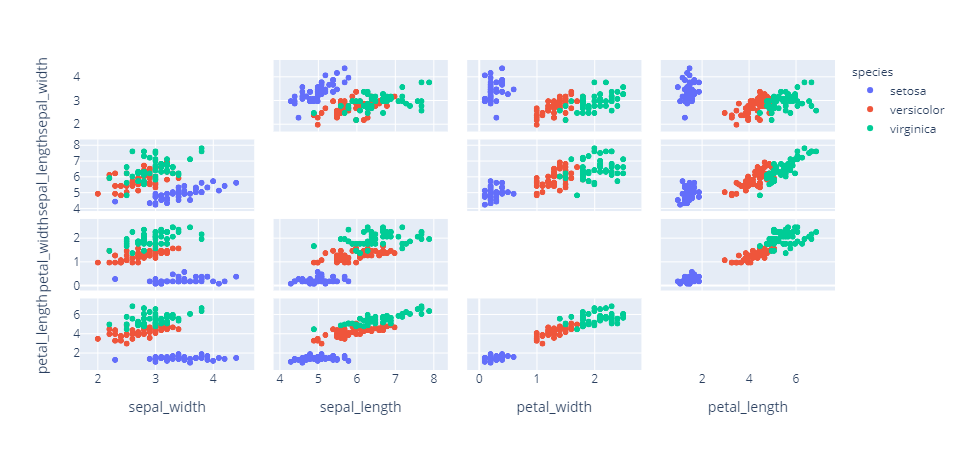

In [3]:
fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

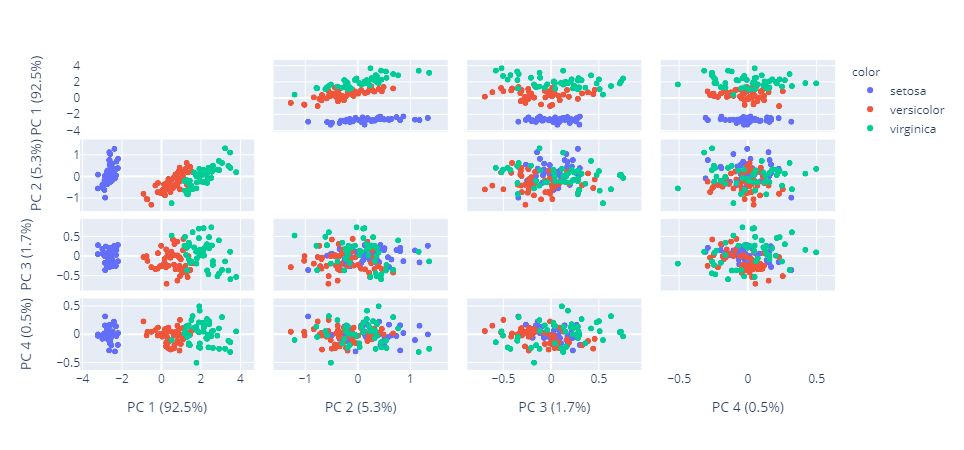

In [4]:
from sklearn.decomposition import PCA

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

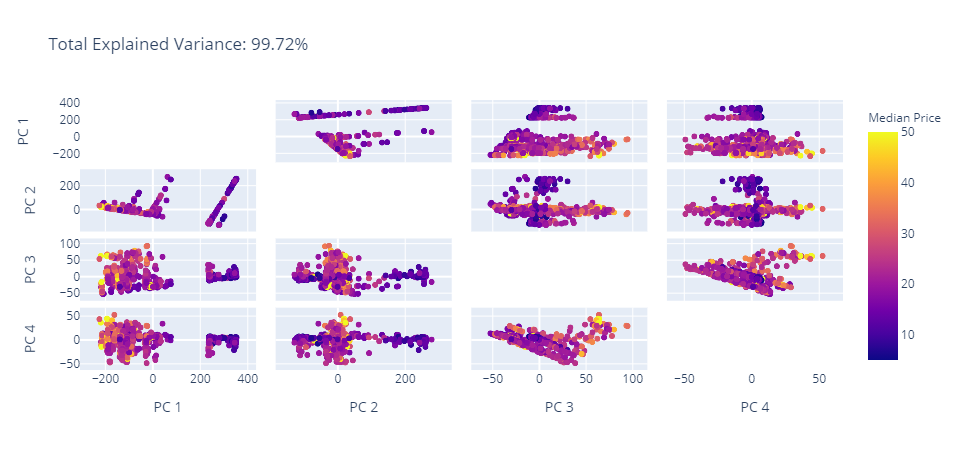

In [5]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
n_components = 4

pca = PCA(n_components=n_components)
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=boston.target,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [7]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(
    boston.data, columns=boston.feature_names)

app = dash.Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id="graph"),
    html.P("Number of components:"),
    dcc.Slider(
        id='slider',
        min=2, max=5, value=3,
        marks={i: str(i) for i in range(2,6)})
])

@app.callback(
    Output("graph", "figure"), 
    [Input("slider", "value")])
def run_and_plot(n_components):

    pca = PCA(n_components=n_components)
    components = pca.fit_transform(df)

    var = pca.explained_variance_ratio_.sum() * 100

    labels = {str(i): f"PC {i+1}" 
              for i in range(n_components)}
    labels['color'] = 'Median Price'

    fig = px.scatter_matrix(
        components,
        color=boston.target,
        dimensions=range(n_components),
        labels=labels,
        title=f'Total Explained Variance: {var:.2f}%')
    fig.update_traces(diagonal_visible=False)
    return fig

app.run_server(debug=True)

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


SystemExit: 1